In [1]:
library(lubridate)
library(timeDate)
library(dplyr)


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date


Attaching package: ‘dplyr’

The following objects are masked from ‘package:lubridate’:

    intersect, setdiff, union

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
df = read.csv('../data/seattle_911_clean.csv')
df$Timestamp <- as.POSIXct(df$Timestamp)
df$Date <- as.Date(df$Timestamp)
df$Time <- format(df$Timestamp,"%H:%M:%S")
sapply(df, typeof)

X     Address        Type    Latitude   Longitude   Timestamp 
  "integer"   "integer"   "integer"    "double"    "double"    "double" 
       Date        Time 
   "double" "character"

In [3]:
df$Weekday <- weekdays(df$Date)
df$Night <- as.integer((df$Time < "06:00:00") | (df$Time > "18:00:00"))
df$DangHoliday <- as.integer(((month(df$Date) == 7) & (day(df$Date) == 4)) |
                             ((month(df$Date) == 1) & (day(df$Date) == 1)))

In [4]:
years <- seq(2010, 2025)
tgiving <- data.frame(as.Date(USThanksgivingDay(year = years)))
colnames(tgiving) <- "dates"
xmas <- data.frame(as.Date(ChristmasDay(year = years)))
colnames(xmas) <- "dates"
trav <- rbind(tgiving, tgiving - 1, tgiving - 2, xmas, xmas - 1, xmas + 1)
df$TravHoliday <- as.integer(df$Date %in% trav$dates)

In [5]:
earliest_date <- min(df$Date)
df$DayNumber <- as.integer(df$Date - earliest_date)

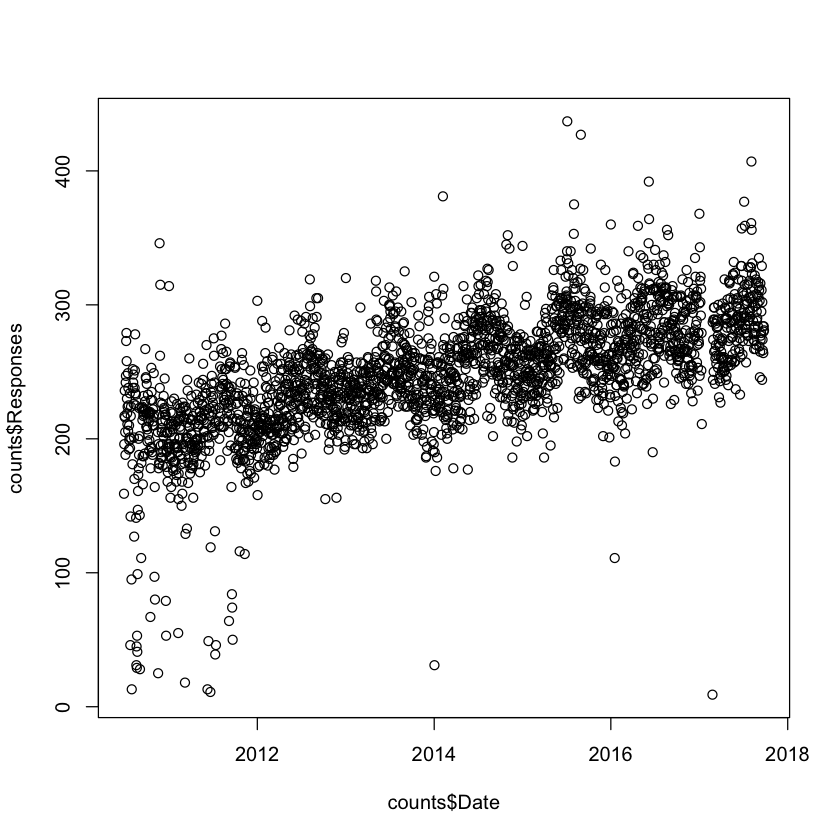

In [6]:
counts <- df %>% group_by(Date) %>% summarise(Responses = n())
plot(x = counts$Date, y = counts$Responses)

In [7]:
head(df)

X,Address,Type,Latitude,Longitude,Timestamp,Date,Time,Weekday,Night,DangHoliday,TravHoliday,DayNumber
1,6900 37th Av S,Medic Response,47.54068,-122.2861,2011-11-09 23:33:00,2011-11-10,23:33:00,Thursday,1,0,0,499
2,N 50th St / Stone Way N,Aid Response,47.66503,-122.3402,2011-11-09 23:32:00,2011-11-10,23:32:00,Thursday,1,0,0,499
3,E John St / E Olive Way,Aid Response,47.61957,-122.3243,2011-11-09 23:32:00,2011-11-10,23:32:00,Thursday,1,0,0,499
4,611 12th Av S,Aid Response,47.59741,-122.3172,2011-11-09 23:29:00,2011-11-10,23:29:00,Thursday,1,0,0,499
5,4545 42nd Av Sw,Automatic Medical Alarm,47.56247,-122.3855,2011-11-09 23:25:00,2011-11-10,23:25:00,Thursday,1,0,0,499
6,2124 3rd Av,Investigate Out Of Service,47.61335,-122.3425,2011-11-09 23:17:00,2011-11-10,23:17:00,Thursday,1,0,0,499


In [ ]:
# TODO seasonality features peaking at August 3rd
